# Imports

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset overview


In [2]:
data = pd.read_csv(r'C:\Users\arq_c\Desktop\ds_projects\datasets\salary_dataset\employee_salary_dataset.csv')

In [3]:
display(data.head())
data.info()

,EmployeeID,Name,Department,Experience_Years,Education_Level,Age,Gender,City,Monthly_Salary
0,1,Employee_1,Marketing,15,Master,53,Female,Delhi,111416
1,2,Employee_2,Operations,7,Bachelor,25,Female,Bangalore,95271
2,3,Employee_3,IT,12,High School,51,Female,Hyderabad,69064
3,4,Employee_4,Operations,8,PhD,44,Male,Delhi,95091
4,5,Employee_5,Operations,15,Master,36,Female,Delhi,132450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        50 non-null     int64 
 1   Name              50 non-null     object
 2   Department        50 non-null     object
 3   Experience_Years  50 non-null     int64 
 4   Education_Level   50 non-null     object
 5   Age               50 non-null     int64 
 6   Gender            50 non-null     object
 7   City              50 non-null     object
 8   Monthly_Salary    50 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 3.6+ KB


# 1. Descriptive Analysis

- Summary statistics: Mean, median, range of Monthly_Salary, Age.

- Distribution analysis: How are employees distributed across Departments, Education levels, Cities, and Gender.

- Salary distribution: Histogram of Monthly_Salary to understand spread

## Summary statistics

### `Monthly_salary by` `Age` and `Experience_Years`

In [4]:
mean_salary_age = data.groupby('Age', as_index=False)['Monthly_Salary'].mean()
median_salary_age = data.groupby('Age', as_index=False)['Monthly_Salary'].median()

In [5]:
print('Salario promedio por edad:')
display(mean_salary_age)

Salario promedio por edad:


,Age,Monthly_Salary
0,22,90858.000000
1,23,83815.400000
2,24,37094.500000
3,25,95271.000000
4,27,74048.000000
5,28,31893.000000
6,29,118179.000000
7,30,99543.000000
8,32,55746.000000
9,33,81491.000000


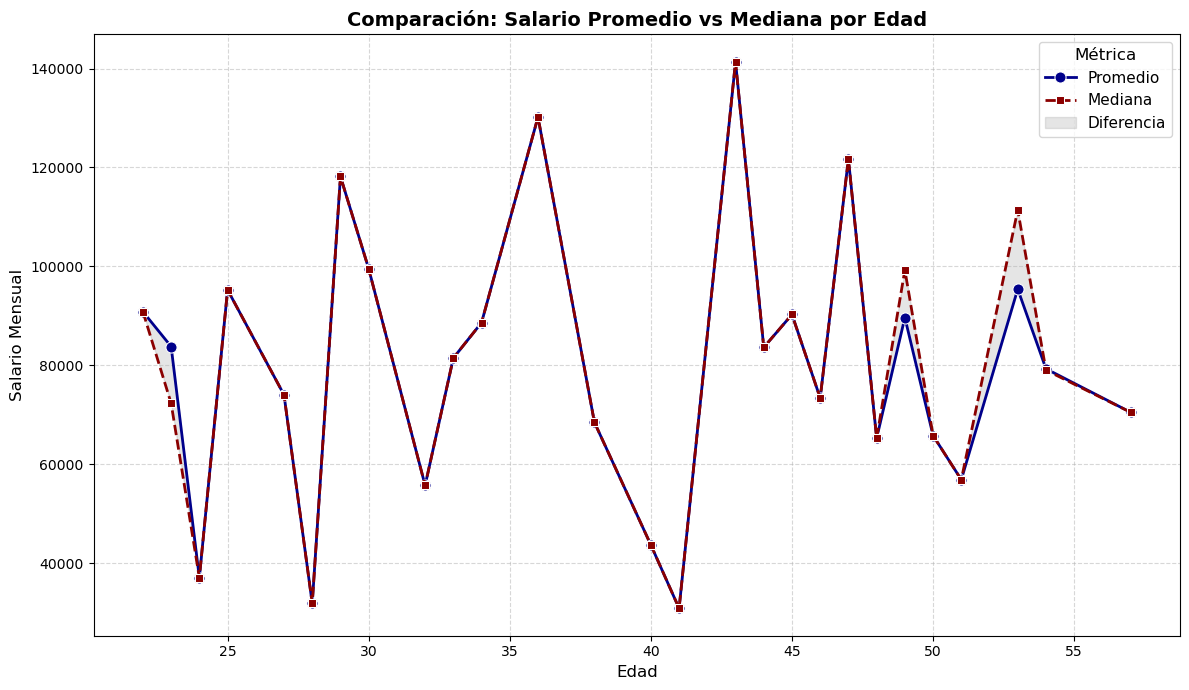

In [6]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=mean_salary_age, x='Age', y='Monthly_Salary', marker='o', 
             linewidth=2, markersize=8, color='darkblue', label='Promedio')
sns.lineplot(data=median_salary_age, x='Age', y='Monthly_Salary', marker='s', 
             linewidth=2, markersize=6, color='darkred', linestyle='--', label='Mediana')

# Rellenar el área entre las dos líneas
plt.fill_between(mean_salary_age['Age'], 
                 mean_salary_age['Monthly_Salary'], 
                 median_salary_age['Monthly_Salary'],
                 alpha=0.2, color='gray', label='Diferencia')

plt.xlabel('Edad', fontsize=12)
plt.ylabel('Salario Mensual', fontsize=12)
plt.title('Comparación: Salario Promedio vs Mediana por Edad', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Métrica', fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()

### Notes:

- In the **23**, **49** and **53**. There are notable differences between the mean and median values.
    - 23, mean value is greater than median, indicating a positive skew. There are higher monthly salaries at the right tail of the ditribution. 
    - 49 and 53, mean value is lower than median, indicating a negative skew. There are lower monthly salaries at the left tail of the distribution.

## Distribution analysis


How are employees distributed across Departments, Education levels, Cities, and Gender.

In [8]:
e_per_dept = data.groupby('Department', as_index=False).agg(
    Employee_Count=('EmployeeID', 'count'),
    Total_Salaries_Dept = ('Monthly_Salary', 'sum')
)

display(e_per_dept)

,Department,Employee_Count,Total_Salaries_Dept
0,Finance,10,672619
1,HR,7,580616
2,IT,10,765205
3,Marketing,13,1253601
4,Operations,10,842399


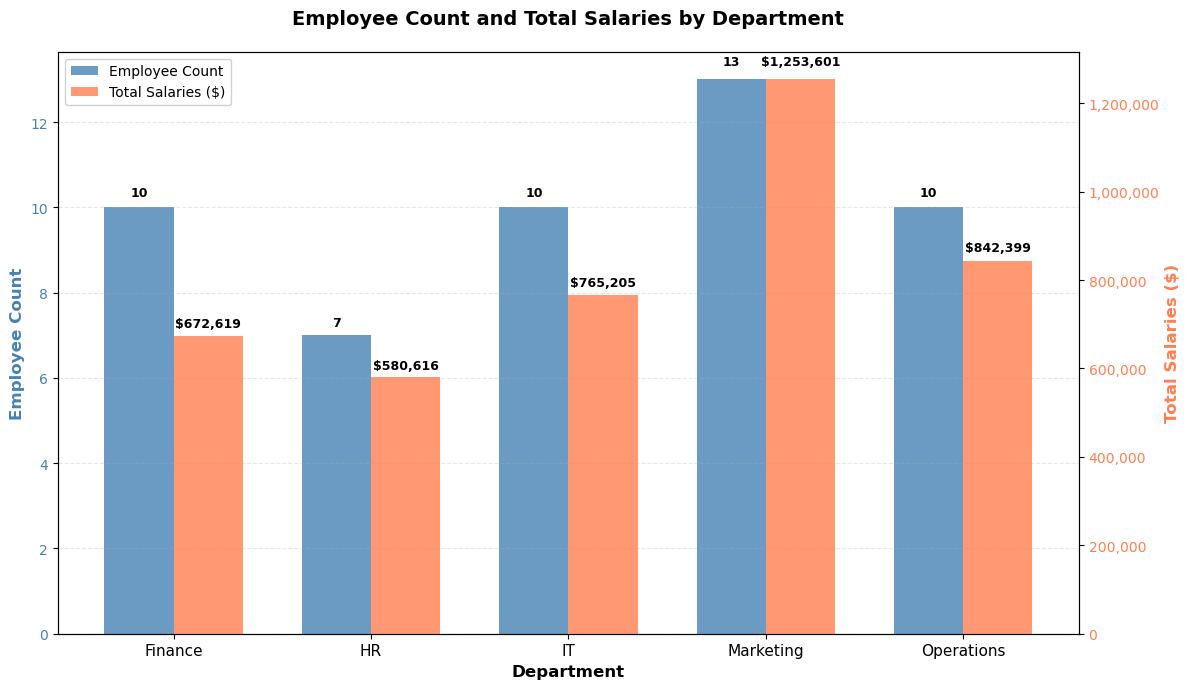

In [10]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 7))

# X positions for bars
x = np.arange(len(e_per_dept))
width = 0.35

# Create bars for Employee Count (primary y-axis)
bars1 = ax1.bar(x - width/2, e_per_dept['Employee_Count'], width, 
                label='Employee Count', color='steelblue', alpha=0.8)

# Set up primary y-axis (Employee Count)
ax1.set_xlabel('Department', fontsize=12, fontweight='bold')
ax1.set_ylabel('Employee Count', fontsize=12, fontweight='bold', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x)
ax1.set_xticklabels(e_per_dept['Department'], rotation=0, fontsize=11)
ax1.set_title('Employee Count and Total Salaries by Department', 
              fontsize=14, fontweight='bold', pad=20)

# Create secondary y-axis for Total Salaries
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, e_per_dept['Total_Salaries_Dept'], width, 
                label='Total Salaries ($)', color='coral', alpha=0.8)

# Set up secondary y-axis (Total Salaries)
ax2.set_ylabel('Total Salaries ($)', fontsize=12, fontweight='bold', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Format salary values on y-axis with commas
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Add value labels on top of bars
def add_value_labels(bars, axis, is_currency=False):
    for bar in bars:
        height = bar.get_height()
        value = f'${height:,.0f}' if is_currency else f'{height:,.0f}'
        axis.text(bar.get_x() + bar.get_width()/2, height * 1.02,
                 value, ha='center', va='bottom', fontsize=9,
                 fontweight='bold', color='black')

add_value_labels(bars1, ax1, is_currency=False)
add_value_labels(bars2, ax2, is_currency=True)

# Add grid for better readability
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', framealpha=0.9)

plt.show()